<a href="https://colab.research.google.com/github/flaxoDS/CompletelyNew/blob/master/iqothnccd_lung_cancer_RESNET_Custom_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"felixg1999","key":"b1bc3432f37f4836d7e9449d9529ecdb"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d adityamahimkar/iqothnccd-lung-cancer-dataset


Dataset URL: https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset
License(s): copyright-authors
 61% 121M/199M [00:00<00:00, 1.27GB/s]
100% 199M/199M [00:00<00:00, 925MB/s] 


In [4]:
!unzip iqothnccd-lung-cancer-dataset.zip -d lung_ct_dataset


Archive:  iqothnccd-lung-cancer-dataset.zip
  inflating: lung_ct_dataset/Test cases/000001_03_01_088.png  
  inflating: lung_ct_dataset/Test cases/000017_02_01_016.png  
  inflating: lung_ct_dataset/Test cases/000019_01_01_021.png  
  inflating: lung_ct_dataset/Test cases/000019_02_01_025.png  
  inflating: lung_ct_dataset/Test cases/000019_03_01_025.png  
  inflating: lung_ct_dataset/Test cases/000020_01_01_066.png  
  inflating: lung_ct_dataset/Test cases/000020_02_01_062.png  
  inflating: lung_ct_dataset/Test cases/000020_03_01_134.png  
  inflating: lung_ct_dataset/Test cases/000020_03_01_166.png  
  inflating: lung_ct_dataset/Test cases/000020_03_01_212.png  
  inflating: lung_ct_dataset/Test cases/000020_04_01_116.png  
  inflating: lung_ct_dataset/Test cases/000020_04_01_143.png  
  inflating: lung_ct_dataset/Test cases/000020_04_01_159.png  
  inflating: lung_ct_dataset/Test cases/000021_01_01_016.png  
  inflating: lung_ct_dataset/Test cases/000021_02_01_068.png  
  inflating

In [5]:
import os

# Zeigt die Hauptverzeichnisse
print("Inhalt von Arbeitsverzeichnis:")
print(os.listdir())

# Falls 'lung_ct_dataset' da ist, zeigen wir den Inhalt
if 'lung_ct_dataset' in os.listdir():
    print("\nInhalt von 'lung_ct_dataset':")
    print(os.listdir('lung_ct_dataset'))


Inhalt von Arbeitsverzeichnis:
['.config', 'kaggle.json', 'iqothnccd-lung-cancer-dataset.zip', 'lung_ct_dataset', 'sample_data']

Inhalt von 'lung_ct_dataset':
['The IQ-OTHNCCD lung cancer dataset', 'Test cases']


In [6]:
import os
os.listdir('./lung_ct_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset')


['Bengin cases',
 'Malignant cases',
 'Normal cases',
 'IQ-OTH_NCCD lung cancer dataset.txt']

In [7]:
import os
import pandas as pd

# Angepasster Pfad zum richtigen Ordner
base_path = './lung_ct_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'

# Mapping von Ordnernamen zu Labels
category_mapping = {
    'Normal cases': 'Normal',
    'Malignant cases': 'Malignant',
    'Bengin cases': 'Benign'  # Schreibfehler im Original-Folder ("Bengin")
}

data = []

for folder_name, label in category_mapping.items():
    folder_path = os.path.join(base_path, folder_name)
    if not os.path.isdir(folder_path):
        print(f"⚠️  Ordner nicht gefunden: {folder_path}")
        continue
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.png'):
            filepath = os.path.join(folder_path, filename)
            data.append({
                'filepath': filepath,
                'label': label
            })

df = pd.DataFrame(data)
print("✅ DataFrame erstellt:")
df.head()


✅ DataFrame erstellt:


""


Schritt 2a: Label-Encoding

In [8]:
import os

# Zeige Inhalt eines Ordners
check_path = './lung_ct_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases'
print("Dateien im Ordner 'Normal cases':")
print(os.listdir(check_path)[:10])  # nur die ersten 10 anzeigen


Dateien im Ordner 'Normal cases':
['Normal case (206).jpg', 'Normal case (288).jpg', 'Normal case (318).jpg', 'Normal case (255).jpg', 'Normal case (30).jpg', 'Normal case (99).jpg', 'Normal case (173).jpg', 'Normal case (14).jpg', 'Normal case (151).jpg', 'Normal case (57).jpg']


In [9]:
import os
import pandas as pd

base_path = './lung_ct_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'

category_mapping = {
    'Normal cases': 'Normal',
    'Malignant cases': 'Malignant',
    'Bengin cases': 'Benign'  # Schreibfehler bleibt so!
}

data = []

for folder_name, label in category_mapping.items():
    folder_path = os.path.join(base_path, folder_name)
    if not os.path.isdir(folder_path):
        print(f"⚠️  Ordner nicht gefunden: {folder_path}")
        continue
    for filename in os.listdir(folder_path):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            filepath = os.path.join(folder_path, filename)
            data.append({'filepath': filepath, 'label': label})

df = pd.DataFrame(data)
print(f"✅ {len(df)} Bilder geladen.")
df.head()


✅ 1097 Bilder geladen.


,filepath,label
0,./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...,Normal
1,./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...,Normal
2,./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...,Normal
3,./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...,Normal
4,./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...,Normal


In [10]:
from sklearn.preprocessing import LabelEncoder

# Encoder initialisieren und anwenden
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Mapping anzeigen
print("📋 Label Mapping:")
for label, idx in zip(le.classes_, le.transform(le.classes_)):
    print(f"{label}: {idx}")


📋 Label Mapping:
Benign: 0
Malignant: 1
Normal: 2


In [11]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['label_encoded'],  # Klassenverteilung beibehalten
    random_state=42
)

print(f"✅ Trainingsbeispiele: {len(train_df)}")
print(f"✅ Testbeispiele: {len(test_df)}")


✅ Trainingsbeispiele: 877
✅ Testbeispiele: 220


In [12]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


In [13]:
from torch.utils.data import Dataset
from PIL import Image
import torch
import torchvision.transforms as transforms

class LungCTDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform if transform else transforms.ToTensor()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Bild laden
        image_path = self.df.loc[idx, 'filepath']
        image = Image.open(image_path).convert('RGB')  # auch wenn ursprünglich CT, besser RGB für CNNs
        image = self.transform(image)

        # Label holen
        label = self.df.loc[idx, 'label_encoded']
        label = torch.tensor(label, dtype=torch.long)

        return image, label


In [14]:
from torch.utils.data import Dataset
from PIL import Image
import torch
import torchvision.transforms as transforms

class LungCTDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform if transform else transforms.ToTensor()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Bild laden
        image_path = self.df.loc[idx, 'filepath']
        image = Image.open(image_path).convert('RGB')  # auch wenn ursprünglich CT, besser RGB für CNNs
        image = self.transform(image)

        # Label holen
        label = self.df.loc[idx, 'label_encoded']
        label = torch.tensor(label, dtype=torch.long)

        return image, label


In [15]:
train_dataset = LungCTDataset(train_df, transform=transform)
test_dataset = LungCTDataset(test_df, transform=transform)


In [16]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [17]:
from torchvision import models
import torch.nn as nn

# 1. Vortrainiertes ResNet18-Modell laden (ImageNet)
resnet18 = models.resnet18(pretrained=True)

# 2. Feature-Extractor einfrieren (kein Training auf Conv-Blöcken)
for param in resnet18.parameters():
    param.requires_grad = False

# 3. Klassifikator ersetzen (wir haben 3 Klassen: Normal, Benign, Malignant)
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 3)  # ← Output: 3 Klassen


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 188MB/s]


In [18]:
import torch

# CUDA oder CPU je nach Verfügbarkeit
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modell auf das Gerät verschieben
resnet18 = resnet18.to(device)


In [19]:
import torch.nn as nn
import torch.optim as optim

# Loss-Funktion für Multi-Class Classification
loss_fn = nn.CrossEntropyLoss()

# Optimizer: nur die trainierbaren Parameter (also .fc)
optimizer = optim.Adam(resnet18.fc.parameters(), lr=0.001)


In [20]:
num_epochs = 5

for epoch in range(num_epochs):
    resnet18.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Vorwärtsdurchlauf
        outputs = resnet18(images)
        loss = loss_fn(outputs, labels)

        # Rückwärtsdurchlauf & Optimierung
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"🔁 Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


🔁 Epoch 1/5, Loss: 0.8190
🔁 Epoch 2/5, Loss: 0.5310
🔁 Epoch 3/5, Loss: 0.4464
🔁 Epoch 4/5, Loss: 0.3741
🔁 Epoch 5/5, Loss: 0.3387


In [21]:
resnet18.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18(images)
        preds = torch.argmax(outputs, dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
print(f"✅ Test Accuracy: {accuracy:.2f}%")


✅ Test Accuracy: 87.27%


In [22]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

# Klasse → Name-Mapping
idx_to_class = {i: label for i, label in enumerate(le.classes_)}


resnet18.eval()
wrong_images = []
wrong_preds = []
wrong_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18(images)
        preds = torch.argmax(outputs, dim=1)

        # Falsch klassifizierte herausfiltern
        for i in range(len(labels)):
            if preds[i] != labels[i]:
                wrong_images.append(images[i].cpu())
                wrong_preds.append(preds[i].item())
                wrong_labels.append(labels[i].item())

        if len(wrong_images) >= 12:
            break  # max. 12 anzeigen


<ipython-input-23-f375eac68da9>:16: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


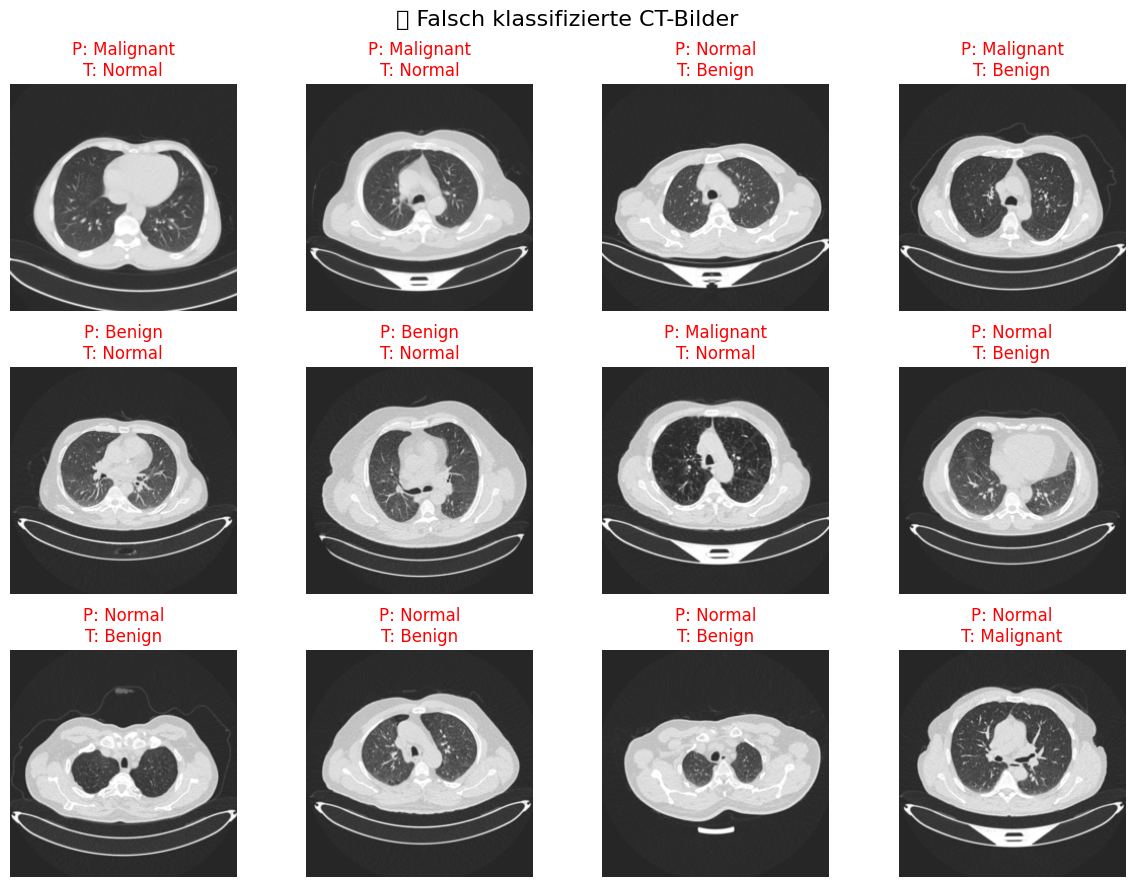

In [23]:
# Grid anzeigen
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle("❌ Falsch klassifizierte CT-Bilder", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i >= len(wrong_images):
        break
    img = wrong_images[i]
    pred = wrong_preds[i]
    true = wrong_labels[i]

    ax.imshow(F.to_pil_image(img))
    ax.axis('off')
    ax.set_title(f"P: {idx_to_class[pred]}\nT: {idx_to_class[true]}", color='red')

plt.tight_layout()
plt.show()


In [24]:
from torchvision import models
import torch.nn as nn

# Vortrainiertes Modell laden
resnet18_ft = models.resnet18(pretrained=True)

# 🧊 Dieses Mal: NICHT einfrieren
# for param in resnet18_ft.parameters():
#     param.requires_grad = False  ← AUSKOMMENTIERT

# Klassifikator neu setzen (3 Klassen)
num_features = resnet18_ft.fc.in_features
resnet18_ft.fc = nn.Linear(num_features, 3)


In [25]:
resnet18_ft = resnet18_ft.to(device)


In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18_ft.parameters(), lr=0.0001)  # kleinere Lernrate empfohlen


In [27]:
num_epochs = 5

for epoch in range(num_epochs):
    resnet18_ft.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = resnet18_ft(images)
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"🔁 Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")



🔁 Epoch 1/5, Loss: 0.2651
🔁 Epoch 2/5, Loss: 0.0262
🔁 Epoch 3/5, Loss: 0.0099
🔁 Epoch 4/5, Loss: 0.0146
🔁 Epoch 5/5, Loss: 0.0260


In [28]:
resnet18_ft.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18_ft(images)
        preds = torch.argmax(outputs, dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
print(f"✅ [Fine-Tuned ResNet18] Test Accuracy: {accuracy:.2f}%")


✅ [Fine-Tuned ResNet18] Test Accuracy: 96.82%


In [29]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

# Mapping Index → Klassenname
idx_to_class = {i: label for i, label in enumerate(le.classes_)}

# Bilder & Vorhersagen sammeln
resnet18_ft.eval()
wrong_images = []
wrong_preds = []
wrong_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18_ft(images)
        preds = torch.argmax(outputs, dim=1)

        for i in range(len(labels)):
            if preds[i] != labels[i]:
                wrong_images.append(images[i].cpu())
                wrong_preds.append(preds[i].item())
                wrong_labels.append(labels[i].item())

        if len(wrong_images) >= 12:
            break


<ipython-input-30-2c2c565f4e60>:16: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


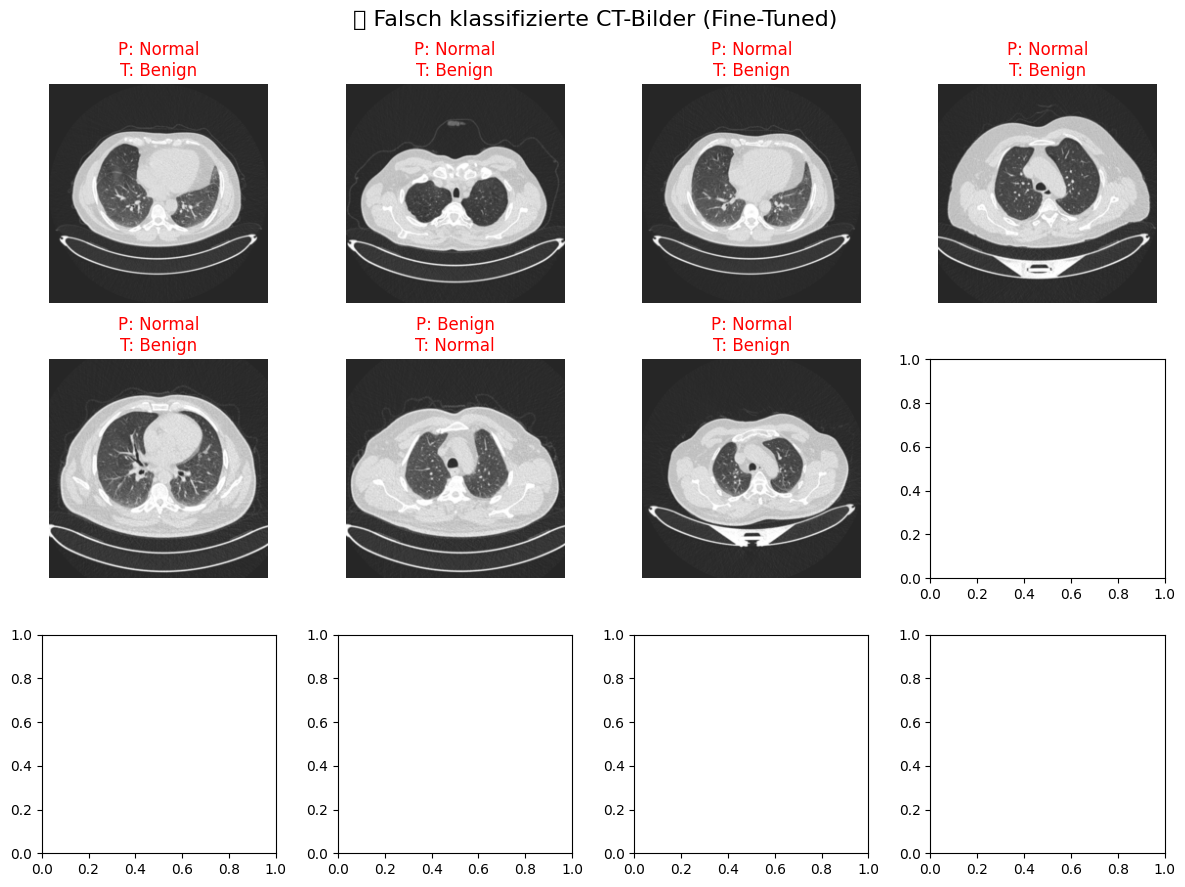

In [30]:
if wrong_images:
    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    fig.suptitle("❌ Falsch klassifizierte CT-Bilder (Fine-Tuned)", fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i >= len(wrong_images):
            break
        img = wrong_images[i]
        pred = wrong_preds[i]
        true = wrong_labels[i]

        ax.imshow(F.to_pil_image(img))
        ax.axis('off')
        ax.set_title(f"P: {idx_to_class[pred]}\nT: {idx_to_class[true]}", color='red')

    plt.tight_layout()
    plt.show()
else:
    print("✅ Keine falsch klassifizierten Bilder gefunden.")


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


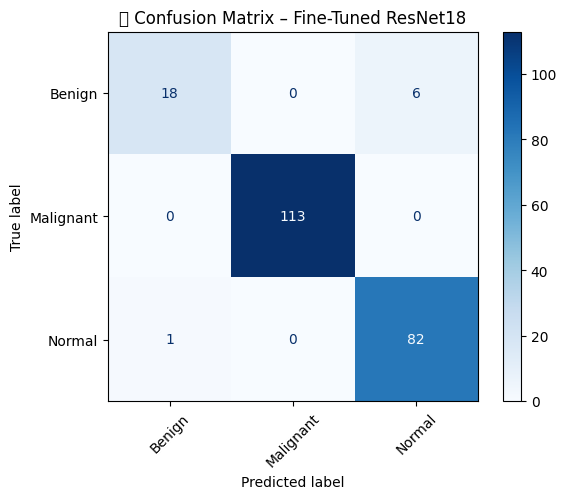

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sammle alle echten Labels und Vorhersagen
y_true = []
y_pred = []

resnet18_ft.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18_ft(images)
        preds = torch.argmax(outputs, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Confusion Matrix berechnen
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("🔍 Confusion Matrix – Fine-Tuned ResNet18")
plt.show()


In [32]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleLungCNN(nn.Module):
    def __init__(self):
        super(SimpleLungCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, 3)  # 3 Klassen

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [3x224x224] → [16x112x112]
        x = self.pool(F.relu(self.conv2(x)))  # → [32x56x56]
        x = x.view(-1, 32 * 56 * 56)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [33]:
model_custom = SimpleLungCNN().to(device)
optimizer_custom = torch.optim.Adam(model_custom.parameters(), lr=0.001)
loss_fn_custom = nn.CrossEntropyLoss()


In [34]:
num_epochs = 10

for epoch in range(num_epochs):
    model_custom.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model_custom(images)
        loss = loss_fn_custom(outputs, labels)

        optimizer_custom.zero_grad()
        loss.backward()
        optimizer_custom.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"🔁 Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")



🔁 Epoch 1/10, Loss: 0.8905
🔁 Epoch 2/10, Loss: 0.3684
🔁 Epoch 3/10, Loss: 0.1463
🔁 Epoch 4/10, Loss: 0.0696
🔁 Epoch 5/10, Loss: 0.0209
🔁 Epoch 6/10, Loss: 0.0145
🔁 Epoch 7/10, Loss: 0.0105
🔁 Epoch 8/10, Loss: 0.0122
🔁 Epoch 9/10, Loss: 0.0106
🔁 Epoch 10/10, Loss: 0.0146


In [35]:
model_custom.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_custom(images)
        preds = torch.argmax(outputs, dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy_custom = 100 * correct / total
print(f"✅ [Custom CNN] Test Accuracy: {accuracy_custom:.2f}%")


✅ [Custom CNN] Test Accuracy: 99.09%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


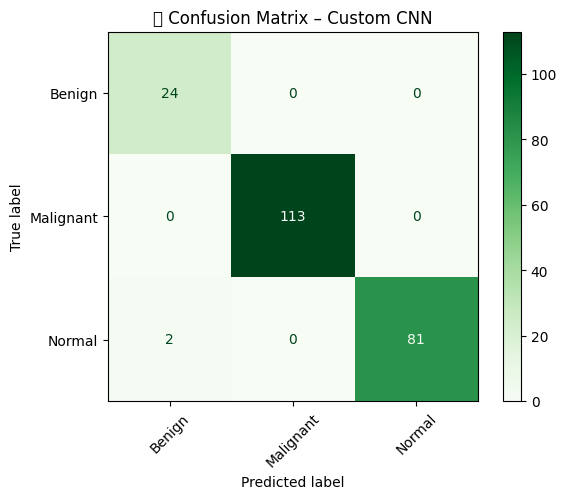

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Wahre Labels und Vorhersagen sammeln
y_true = []
y_pred = []

model_custom.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_custom(images)
        preds = torch.argmax(outputs, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Confusion Matrix erstellen und anzeigen
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Greens", xticks_rotation=45)
plt.title("🧱 Confusion Matrix – Custom CNN")
plt.show()


Multimodale Modelle: CT+Age+Smoker+Biomarkers

In [37]:
import numpy as np

# Füge Zufallsdaten zu deinem bestehenden df hinzu
np.random.seed(42)

df['age'] = np.random.randint(40, 80, size=len(df))            # Alter zwischen 40–79
df['smoker'] = np.random.randint(0, 2, size=len(df))           # 0 = Nichtraucher, 1 = Raucher
df['marker1'] = np.random.uniform(0.1, 1.0, size=len(df))      # Biomarker 1
df['marker2'] = np.random.uniform(0.1, 1.0, size=len(df))      # Biomarker 2

df.head()


,filepath,label,label_encoded,age,smoker,marker1,marker2
0,./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...,Normal,2,78,1,0.126976,0.365157
1,./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...,Normal,2,68,0,0.377137,0.112884
2,./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...,Normal,2,54,1,0.734213,0.764083
3,./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...,Normal,2,47,1,0.281668,0.850730
4,./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...,Normal,2,60,0,0.706089,0.766429


In [38]:
from sklearn.model_selection import train_test_split

# Split mit den neuen Features
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['label_encoded'],
    random_state=42
)

print(f"Train-Beispiele: {len(train_df)}, Test-Beispiele: {len(test_df)}")


Train-Beispiele: 877, Test-Beispiele: 220


In [39]:
from torch.utils.data import Dataset
from PIL import Image
import torch

class MultimodalLungDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform
        self.meta_columns = ['age', 'smoker', 'marker1', 'marker2']

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Bild laden und transformieren
        img_path = self.df.loc[idx, 'filepath']
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Metadaten holen und zu Tensor umwandeln
        meta_data = self.df.loc[idx, self.meta_columns].values.astype(np.float32)
        meta_tensor = torch.tensor(meta_data)

        # Label holen
        label = self.df.loc[idx, 'label_encoded']
        label = torch.tensor(label, dtype=torch.long)

        return image, meta_tensor, label


In [40]:
from torch.utils.data import Dataset
from PIL import Image
import torch

class MultimodalLungDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform
        self.meta_columns = ['age', 'smoker', 'marker1', 'marker2']

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Bild laden und transformieren
        img_path = self.df.loc[idx, 'filepath']
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Metadaten holen und zu Tensor umwandeln
        meta_data = self.df.loc[idx, self.meta_columns].values.astype(np.float32)
        meta_tensor = torch.tensor(meta_data)

        # Label holen
        label = self.df.loc[idx, 'label_encoded']
        label = torch.tensor(label, dtype=torch.long)

        return image, meta_tensor, label


In [41]:
class MultimodalNet(nn.Module):
    def __init__(self):
        super(MultimodalNet, self).__init__()

        # 🖼️ CNN-Zweig (kann auch ein kleineres Modell sein)
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),  # [3x224x224] → [16x224x224]
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                         # → [16x112x112]
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                         # → [32x56x56]
        )
        self.cnn_fc = nn.Linear(32 * 56 * 56, 128)

        # 📊 Metadaten-Zweig
        self.meta_fc = nn.Sequential(
            nn.Linear(4, 32),     # 4 Metafeatures: age, smoker, marker1, marker2
            nn.ReLU(),
            nn.Linear(32, 32),
        )

        # 🔗 Fusion beider Zweige
        self.combined_fc = nn.Sequential(
            nn.Linear(128 + 32, 64),
            nn.ReLU(),
            nn.Linear(64, 3)  # 3 Klassen
        )

    def forward(self, image, meta):
        x_img = self.cnn(image)
        x_img = x_img.view(x_img.size(0), -1)
        x_img = self.cnn_fc(x_img)

        x_meta = self.meta_fc(meta)

        x = torch.cat((x_img, x_meta), dim=1)
        out = self.combined_fc(x)
        return out


In [42]:
train_dataset = MultimodalLungDataset(train_df, transform=transform)
test_dataset = MultimodalLungDataset(test_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [43]:
model_mm = MultimodalNet().to(device)

loss_fn_mm = nn.CrossEntropyLoss()
optimizer_mm = torch.optim.Adam(model_mm.parameters(), lr=0.001)


In [44]:
num_epochs = 5

for epoch in range(num_epochs):
    model_mm.train()
    total_loss = 0

    for images, metas, labels in train_loader:
        images, metas, labels = images.to(device), metas.to(device), labels.to(device)

        outputs = model_mm(images, metas)
        loss = loss_fn_mm(outputs, labels)

        optimizer_mm.zero_grad()
        loss.backward()
        optimizer_mm.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"🔁 Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


🔁 Epoch 1/5, Loss: 1.2327
🔁 Epoch 2/5, Loss: 0.5083
🔁 Epoch 3/5, Loss: 0.1965
🔁 Epoch 4/5, Loss: 0.0709
🔁 Epoch 5/5, Loss: 0.0355


In [45]:
model_mm.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, metas, labels in test_loader:
        images, metas, labels = images.to(device), metas.to(device), labels.to(device)
        outputs = model_mm(images, metas)
        preds = torch.argmax(outputs, dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy_mm = 100 * correct / total
print(f"✅ [Multimodales Modell] Test Accuracy: {accuracy_mm:.2f}%")


✅ [Multimodales Modell] Test Accuracy: 98.64%


In [54]:
torch.save(model_mm.state_dict(), "model_mm.pth")


In [ ]:
model_mm.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, metas, labels in test_loader:
        images, metas, labels = images.to(device), metas.to(device), labels.to(device)
        outputs = model_mm(images, metas)
        preds = torch.argmax(outputs, dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy_mm = 100 * correct / total
print(f"✅ [Multimodales Modell] Test Accuracy: {accuracy_mm:.2f}%")


✅ [Multimodales Modell] Test Accuracy: 98.64%


In [ ]:
model_mm.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, metas, labels in test_loader:
        images, metas, labels = images.to(device), metas.to(device), labels.to(device)
        outputs = model_mm(images, metas)
        preds = torch.argmax(outputs, dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy_mm = 100 * correct / total
print(f"✅ [Multimodales Modell] Test Accuracy: {accuracy_mm:.2f}%")


✅ [Multimodales Modell] Test Accuracy: 98.64%


In [ ]:
model_mm.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, metas, labels in test_loader:
        images, metas, labels = images.to(device), metas.to(device), labels.to(device)
        outputs = model_mm(images, metas)
        preds = torch.argmax(outputs, dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy_mm = 100 * correct / total
print(f"✅ [Multimodales Modell] Test Accuracy: {accuracy_mm:.2f}%")


✅ [Multimodales Modell] Test Accuracy: 98.64%


In [46]:
# Prüfen, ob Metadaten pro Bild konsistent sind
print(train_df[['filepath', 'age', 'smoker', 'marker1', 'marker2']].head(30))


                                               filepath  age  smoker  \
457   ./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...   73       1   
402   ./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...   55       0   
207   ./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...   65       0   
427   ./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...   67       0   
1074  ./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...   68       1   
901   ./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...   44       0   
74    ./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...   64       1   
641   ./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...   67       1   
414   ./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...   75       1   
43    ./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...   59       1   
945   ./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...   72       0   
306   ./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...   72       1   
276   ./lung_ct_dataset/The IQ-OTHNCCD lung cancer d...   77    

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


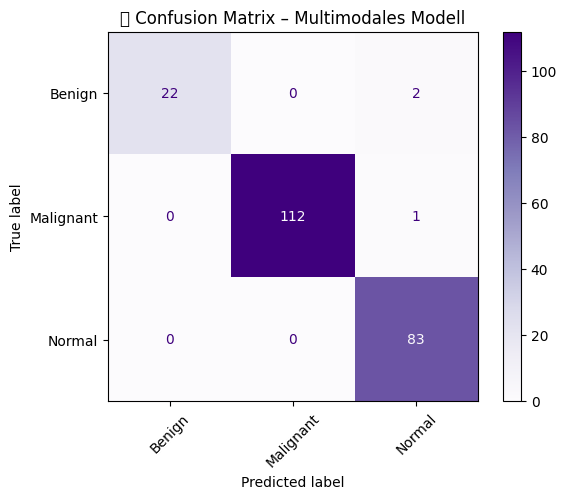

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Labels und Predictions sammeln
y_true = []
y_pred = []

model_mm.eval()
with torch.no_grad():
    for images, metas, labels in test_loader:
        images, metas, labels = images.to(device), metas.to(device), labels.to(device)
        outputs = model_mm(images, metas)
        preds = torch.argmax(outputs, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Matrix anzeigen
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Purples", xticks_rotation=45)
plt.title("🧬 Confusion Matrix – Multimodales Modell")
plt.show()


In [48]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 124.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.2 MB/s eta 0:00:00


In [57]:
model_mm = MultimodalNet().to(device)
model_mm.load_state_dict(torch.load("dein_modell.pth"))  # falls du es gespeichert hast
model_mm.eval()


FileNotFoundError: [Errno 2] No such file or directory: 'dein_modell.pth'

In [50]:
model_mm.eval()


MultimodalNet(
  (cnn): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_fc): Linear(in_features=100352, out_features=128, bias=True)
  (meta_fc): Sequential(
    (0): Linear(in_features=4, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
  )
  (combined_fc): Sequential(
    (0): Linear(in_features=160, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=3, bias=True)
  )
)

In [58]:
import gradio as gr
from PIL import Image
import torch

# Das Modell in den Eval-Modus setzen
model_mm.eval()

# Mapping zurück zu Textlabeln
idx_to_class = {i: label for i, label in enumerate(le.classes_)}

# Vorhersagefunktion für Gradio
def predict(image, age, smoker, marker1, marker2):
    # Bild vorbereiten
    img_tensor = transform(image).unsqueeze(0).to(device)

    # Metadaten vorbereiten
    meta = torch.tensor([[age, smoker, marker1, marker2]], dtype=torch.float32).to(device)

    with torch.no_grad():
        output = model_mm(img_tensor, meta)
        pred = torch.argmax(output, dim=1).item()
        label = idx_to_class[pred]

    return f"✅ Diagnose: {label}"


In [56]:
model_mm = MultimodalNet().to(device)
model_mm.load_state_dict(torch.load("model_mm.pth"))
model_mm.eval()


MultimodalNet(
  (cnn): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_fc): Linear(in_features=100352, out_features=128, bias=True)
  (meta_fc): Sequential(
    (0): Linear(in_features=4, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
  )
  (combined_fc): Sequential(
    (0): Linear(in_features=160, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=3, bias=True)
  )
)

In [59]:
import gradio as gr

# Mapping-Index zu Textlabel
idx_to_class = {i: label for i, label in enumerate(le.classes_)}

def predict(image, age, smoker, marker1, marker2):
    model_mm.eval()

    img_tensor = transform(image).unsqueeze(0).to(device)
    meta = torch.tensor([[age, smoker, marker1, marker2]], dtype=torch.float32).to(device)

    with torch.no_grad():
        output = model_mm(img_tensor, meta)
        pred = torch.argmax(output, dim=1).item()
        return f"✅ Diagnose: {idx_to_class[pred]}"


In [60]:
gr.Interface(
    fn=predict,
    inputs=[
        gr.Image(type="pil", label="📷 CT-Bild hochladen"),
        gr.Number(label="Alter"),
        gr.Radio([0, 1], label="Raucher (0=Nein, 1=Ja)"),
        gr.Slider(0.1, 1.0, step=0.01, label="Marker1"),
        gr.Slider(0.1, 1.0, step=0.01, label="Marker2"),
    ],
    outputs=gr.Textbox(label="Modell-Vorhersage"),
    title="🧬 Lungenkrebs-Klassifikation",
    description="Dieses multimodale Modell nutzt CT-Bilder + Patientendaten zur Erkennung von Lungenkrebs."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9bc1be1977e6d741e2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
